<a href="https://colab.research.google.com/github/kingsleynwafor54/RemoteSkillHub_Python/blob/main/Timeseriesanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-2672161963.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = pd.DataFrame({"Month": pd.date_range("2019-01-01", periods=60, freq="M"),


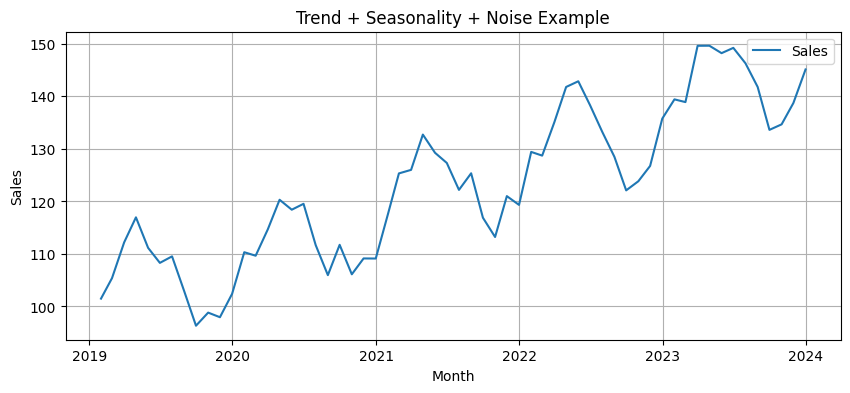

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate synthetic time series
np.random.seed(42)
time = np.arange(60)
trend = time * 0.8                   # upward trend
seasonality = 10 * np.sin(2*np.pi*time/12)  # yearly seasonal pattern
noise = np.random.normal(0, 3, 60)   # random noise
sales = 100 + trend + seasonality + noise

df = pd.DataFrame({"Month": pd.date_range("2019-01-01", periods=60, freq="M"),
                   "Sales": sales}).set_index("Month")

plt.figure(figsize=(10,4))
plt.plot(df.index, df["Sales"], label="Sales")
plt.title("Trend + Seasonality + Noise Example")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
10 * np.sin(2*np.pi*time/12)


array([ 0.00000000e+00,  5.00000000e+00,  8.66025404e+00,  1.00000000e+01,
        8.66025404e+00,  5.00000000e+00,  1.22464680e-15, -5.00000000e+00,
       -8.66025404e+00, -1.00000000e+01, -8.66025404e+00, -5.00000000e+00,
       -2.44929360e-15,  5.00000000e+00,  8.66025404e+00,  1.00000000e+01,
        8.66025404e+00,  5.00000000e+00,  3.67394040e-15, -5.00000000e+00,
       -8.66025404e+00, -1.00000000e+01, -8.66025404e+00, -5.00000000e+00,
       -4.89858720e-15,  5.00000000e+00,  8.66025404e+00,  1.00000000e+01,
        8.66025404e+00,  5.00000000e+00,  2.38868024e-14, -5.00000000e+00,
       -8.66025404e+00, -1.00000000e+01, -8.66025404e+00, -5.00000000e+00,
       -7.34788079e-15,  5.00000000e+00,  8.66025404e+00,  1.00000000e+01,
        8.66025404e+00,  5.00000000e+00,  8.57252759e-15, -5.00000000e+00,
       -8.66025404e+00, -1.00000000e+01, -8.66025404e+00, -5.00000000e+00,
       -9.79717439e-15,  5.00000000e+00,  8.66025404e+00,  1.00000000e+01,
        8.66025404e+00,  

In [55]:
dx=pd.read_csv(r'/Electric_Production.csv',parse_dates=["DATE"])

In [57]:
dx.head()

,DATE,IPG2211A2N
0,1985-01-01,72.5052
1,1985-02-01,70.6720
2,1985-03-01,62.4502
3,1985-04-01,57.4714
4,1985-05-01,55.3151


In [60]:
# dx=dx.set_index('DATE')
# dx.columns
# Assign monthly frequency

# dx = dx.sort_values("DATE").reset_index(drop=True)
dx = dx.sort_values("DATE",ascending=True)
dw = dx.set_index("DATE")
dx["TimeIndex"] = np.arange(len(dx))


In [61]:
dw.head()

,IPG2211A2N,TimeIndex
DATE,,
1985-01-01,72.5052,0
1985-02-01,70.6720,1
1985-03-01,62.4502,2
1985-04-01,57.4714,3
1985-05-01,55.3151,4


In [62]:
dx.head()

,DATE,IPG2211A2N,TimeIndex
0,1985-01-01,72.5052,0
1,1985-02-01,70.6720,1
2,1985-03-01,62.4502,2
3,1985-04-01,57.4714,3
4,1985-05-01,55.3151,4


In [63]:
dx.rename(columns={'IPG2211A2N': 'Electric_Production'}, inplace=True)

In [52]:
dx.head()

,Electric_Production,TimeIndex
0,72.5052,0
1,70.6720,1
2,62.4502,2
3,57.4714,3
4,55.3151,4


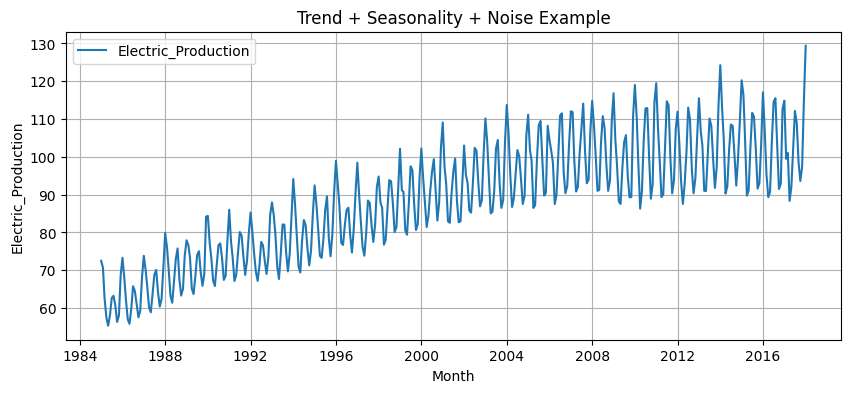

In [65]:
plt.figure(figsize=(10,4))
plt.plot(dw.index, dx["Electric_Production"], label="Electric_Production")
plt.title("Trend + Seasonality + Noise Example")
plt.xlabel("Month")
plt.ylabel("Electric_Production")
plt.grid(True)
plt.legend()
plt.show()

In [80]:
train_size = int(len(dx) * 0.8)  # 80% training, 20% testing

train = dx.iloc[:train_size]
test = dx.iloc[train_size:]


In [81]:
from sklearn.linear_model import LinearRegression
# Prepare features (time) and target (price)
X = train.TimeIndex.values.reshape(-1, 1)
y = train['Electric_Production']

# Train model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [91]:
future_steps = 80
future_time = np.arange(len(dx), len(dx) + future_steps).reshape(-1, 1)
future_dates = pd.date_range(start=dx["DATE"].iloc[-1] + pd.offsets.MonthBegin(1),
                             periods=future_steps, freq='MS')

future_preds = model.predict(future_time)


In [92]:
future_preds

array([117.8763787 , 118.0124867 , 118.14859469, 118.28470268,
       118.42081068, 118.55691867, 118.69302667, 118.82913466,
       118.96524265, 119.10135065, 119.23745864, 119.37356664,
       119.50967463, 119.64578262, 119.78189062, 119.91799861,
       120.05410661, 120.1902146 , 120.32632259, 120.46243059,
       120.59853858, 120.73464658, 120.87075457, 121.00686256,
       121.14297056, 121.27907855, 121.41518655, 121.55129454,
       121.68740253, 121.82351053, 121.95961852, 122.09572652,
       122.23183451, 122.3679425 , 122.5040505 , 122.64015849,
       122.77626649, 122.91237448, 123.04848247, 123.18459047,
       123.32069846, 123.45680645, 123.59291445, 123.72902244,
       123.86513044, 124.00123843, 124.13734642, 124.27345442,
       124.40956241, 124.54567041, 124.6817784 , 124.81788639,
       124.95399439, 125.09010238, 125.22621038, 125.36231837,
       125.49842636, 125.63453436, 125.77064235, 125.90675035,
       126.04285834, 126.17896633, 126.31507433, 126.45

In [84]:
test.head()

,DATE,Electric_Production,TimeIndex
317,2011-06-01,102.8204,317
318,2011-07-01,114.7068,318
319,2011-08-01,113.5958,319
320,2011-09-01,99.4712,320
321,2011-10-01,90.3566,321


In [85]:
train.head()

,DATE,Electric_Production,TimeIndex
0,1985-01-01,72.5052,0
1,1985-02-01,70.6720,1
2,1985-03-01,62.4502,2
3,1985-04-01,57.4714,3
4,1985-05-01,55.3151,4


In [88]:
y_test = test['Electric_Production']

In [90]:
len(y_test)

80

In [93]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, future_preds)
mse = mean_squared_error(y_test, future_preds)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - future_preds) / y_test)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 20.61
RMSE: 22.78
MAPE: 21.06%


🧹 Step 1: Remove noise (Smoothing)<br>
Option A — Moving Average (simple smoothing)

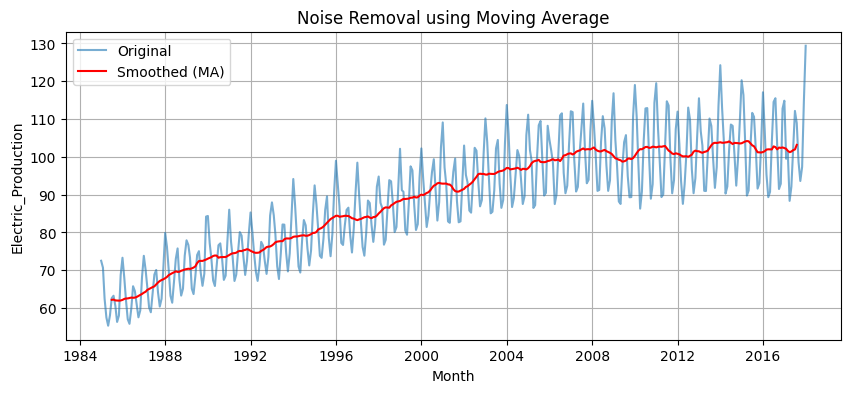

In [103]:
# Smooth the data using a moving average
dx["Smoothed"] = dx["Electric_Production"].rolling(window=12, center=True).mean()

# Plot to compare
plt.figure(figsize=(10,4))
plt.plot(dx["DATE"], dx["Electric_Production"], label="Original", alpha=0.6)
plt.plot(dx["DATE"], dx["Smoothed"], label="Smoothed (MA)", color="red")
plt.title("Noise Removal using Moving Average")
plt.xlabel("Month")
plt.ylabel("Electric_Production")
plt.legend()
plt.grid(True)
plt.show()


🧠 Explanation
Line	Meaning
rolling(window=12)	Looks at each point + previous 11 months (1 year window).
.mean()	Averages those values to smooth out short-term noise.
center=True	Makes the smoothing centered, not shifted forward.
The plot	Shows both original (noisy) and smoothed (cleaner) signals.

✅ Result: You’ll see a red smooth curve that removes small random fluctuations, keeping the big shape (trend + season).

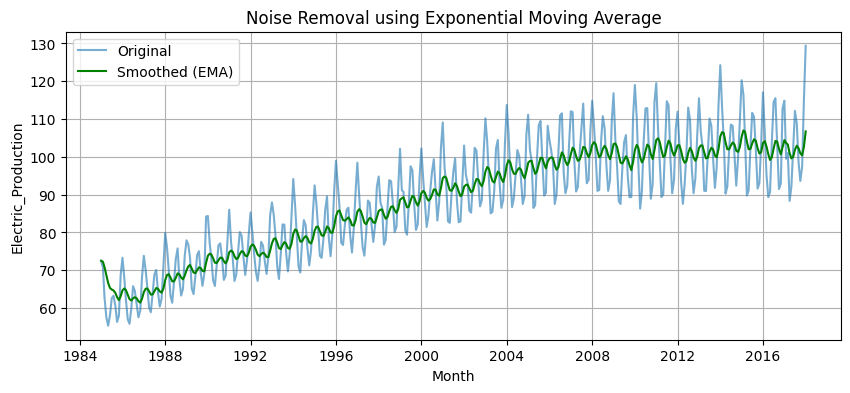

In [104]:
dx["EMA"] = dx["Electric_Production"].ewm(span=12, adjust=False).mean()

plt.figure(figsize=(10,4))
plt.plot(dx["DATE"], dx["Electric_Production"], label="Original", alpha=0.6)
plt.plot(dx["DATE"], dx["EMA"], label="Smoothed (EMA)", color="green")
plt.title("Noise Removal using Exponential Moving Average")
plt.xlabel("Month")
plt.ylabel("Electric_Production")
plt.legend()
plt.grid(True)
plt.show()


🧠 Explanation
Line	Meaning
.ewm(span=12)	Creates an exponentially weighted moving average (weights recent months more).
adjust=False	Keeps the formula simple (no bias correction).
span=12	Sets the “memory” to 12 months — smooths over a year’s time.

✅ EMA smooths noise but reacts faster to changes than normal moving average.
Think of it like “smart smoothing”.

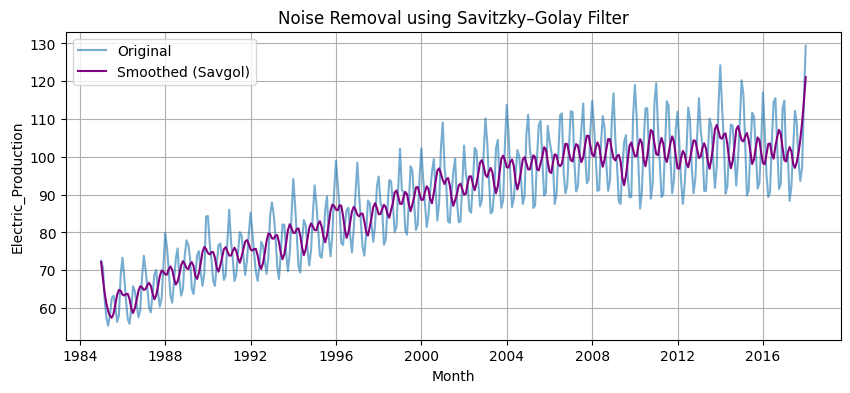

In [105]:
from scipy.signal import savgol_filter

dx["Savgol"] = savgol_filter(dx["Electric_Production"], window_length=13, polyorder=2)

plt.figure(figsize=(10,4))
plt.plot(dx["DATE"], dx["Electric_Production"], label="Original", alpha=0.6)
plt.plot(dx["DATE"], dx["Savgol"], label="Smoothed (Savgol)", color="purple")
plt.title("Noise Removal using Savitzky–Golay Filter")
plt.xlabel("Month")
plt.ylabel("Electric_Production")
plt.legend()
plt.grid(True)
plt.show()


🧠 Explanation
Line	Meaning
savgol_filter()	Fits small polynomial curves to your data (less distortion than averaging).
window_length=13	Uses 13 months per smoothing segment.
polyorder=2	Fits a quadratic curve to smooth data.

✅ Very good when you want smooth lines without losing shape.

🌤️ Step 2: Add Seasonality Features

Now, we’ll help the model “understand” months and repeating cycles.

In [106]:
# Extract month information
dx["month"] = dx["DATE"].dt.month

# Create sine and cosine features for seasonality
dx["sin_month"] = np.sin(2 * np.pi * dx["month"] / 12)
dx["cos_month"] = np.cos(2 * np.pi * dx["month"] / 12)


🧠 Explanation
Line	Meaning
.dt.month	Extracts the month (1–12) from the date.
np.sin(2π * month / 12)	Converts month to a sine wave → captures the seasonal ups and downs (like January low → July high → December low).
np.cos(2π * month / 12)	Works with sine to complete the circular pattern.
Why both?	So the model can understand cyclical behavior (after December → back to January).

✅ The model now knows which part of the yearly cycle each data point belongs to.

In [107]:
from sklearn.linear_model import LinearRegression

# Prepare features (trend + season)
X = dx[["TimeIndex", "sin_month", "cos_month"]].iloc[:train_size]
y = dx["Electric_Production"].iloc[:train_size]

# Train model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [108]:
# Create future features
future_steps = 80
future_time = np.arange(len(dx), len(dx) + future_steps)
future_dates = pd.date_range(start=dx["DATE"].iloc[-1] + pd.offsets.MonthBegin(1),
                             periods=future_steps, freq='MS')

# Build same seasonal features for the future
future_months = future_dates.month
future_sin = np.sin(2 * np.pi * future_months / 12)
future_cos = np.cos(2 * np.pi * future_months / 12)

# Combine features
future_X = pd.DataFrame({
    "TimeIndex": future_time,
    "sin_month": future_sin,
    "cos_month": future_cos
})

# Predict
future_preds = model.predict(future_X)


In [109]:
future_preds

array([119.91478485, 118.654783  , 117.2095689 , 116.00281098,
       115.39428354, 115.58346551, 116.55609023, 118.08796817,
       119.80505837, 121.28369238, 122.16409591, 122.24679003,
       121.54604141, 120.28603956, 118.84082545, 117.63406753,
       117.0255401 , 117.21472207, 118.18734678, 119.71922472,
       121.43631492, 122.91494893, 123.79535246, 123.87804658,
       123.17729796, 121.91729611, 120.47208201, 119.26532409,
       118.65679665, 118.84597862, 119.81860334, 121.35048128,
       123.06757147, 124.54620549, 125.42660902, 125.50930314,
       124.80855451, 123.54855267, 122.10333856, 120.89658064,
       120.2880532 , 120.47723518, 121.44985989, 122.98173783,
       124.69882803, 126.17746204, 127.05786557, 127.14055969,
       126.43981107, 125.17980922, 123.73459512, 122.5278372 ,
       121.91930976, 122.10849173, 123.08111645, 124.61299439,
       126.33008458, 127.8087186 , 128.68912213, 128.77181625,
       128.07106762, 126.81106578, 125.36585167, 124.15

In [114]:
# === Step 0: Imports and setup ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

# ARIMA/SARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

In [115]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_test = test["Electric_Production"]
X_test = dx[["TimeIndex", "sin_month", "cos_month"]].iloc[train_size:]

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE: 11.27
RMSE: 13.73
MAPE: 11.66%


In [111]:
100-11.66

88.34

In [116]:
# === ARIMA model ===
arima_model = ARIMA(train["Electric_Production"], order=(2,1,2))
arima_fit = arima_model.fit()

# Forecast for length of test set
arima_forecast = arima_fit.forecast(steps=len(test))

# Evaluate
arima_mae = mean_absolute_error(test["Electric_Production"], arima_forecast)
arima_rmse = sqrt(mean_squared_error(test["Electric_Production"], arima_forecast))
print(f"ARIMA -> MAE: {arima_mae:.2f}, RMSE: {arima_rmse:.2f}")


ARIMA -> MAE: 5.69, RMSE: 7.03


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [118]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_test = test["Electric_Production"].values

mae = mean_absolute_error(y_test, arima_forecast)
mse = mean_squared_error(y_test, arima_forecast)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test - arima_forecast) / y_test)) * 100

print(f"ARIMA MAE: {mae:.2f}")
print(f"ARIMA RMSE: {rmse:.2f}")
print(f"ARIMA MAPE: {mape:.2f}%")


ARIMA MAE: 5.69
ARIMA RMSE: 7.03
ARIMA MAPE: 5.41%


In [119]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA(p,d,q)(P,D,Q,s)
sarima_model = SARIMAX(
    train["Electric_Production"],
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12)
)
sarima_result = sarima_model.fit(disp=False)


In [120]:
y_pred_sarima = sarima_result.forecast(steps=len(test))

mae_sarima = mean_absolute_error(y_test, y_pred_sarima)
mse_sarima = mean_squared_error(y_test, y_pred_sarima)
rmse_sarima = np.sqrt(mse_sarima)
mape_sarima = np.mean(np.abs((y_test - y_pred_sarima) / y_test)) * 100

print(f"SARIMA MAE: {mae_sarima:.2f}")
print(f"SARIMA RMSE: {rmse_sarima:.2f}")
print(f"SARIMA MAPE: {mape_sarima:.2f}%")


SARIMA MAE: 3.61
SARIMA RMSE: 4.41
SARIMA MAPE: 3.53%
